In [1]:
import numpy as np

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
%%capture
!rm -rf x86_64
!nrnivmodl ../mechanisms

In [4]:
from neuron import h
h.load_file("stdrun.hoc");

In [5]:
from glob import glob
cells = []
for hoc in sorted(glob('Cell_?.hoc')):
    h.load_file(hoc)
    name = hoc.split('.')[0]
    #cmd = 'h.%s("../morphology/", "animal_1_n30_04102017_cel1.swc")' % name
    cmd = 'h.%s("../morphology/")' % name  # default morphology
    cell = eval(cmd)
    cells.append(cell)
    print(cmd)

h.Cell_0("../morphology/")
h.Cell_1("../morphology/")
h.Cell_2("../morphology/")
h.Cell_3("../morphology/")
h.Cell_4("../morphology/")
h.Cell_5("../morphology/")
h.Cell_6("../morphology/")
h.Cell_7("../morphology/")
h.Cell_8("../morphology/")
h.Cell_9("../morphology/")


In [6]:
import json
from collections import OrderedDict
with open('../config/parameters.json') as fp:
    parameters = json.load(fp)
with open('../config/protocols.json') as fp:
    protocols = json.load(fp, object_pairs_hook=OrderedDict)

In [7]:
celsius = parameters[0]['value']
v_init = parameters[1]['value']

In [8]:
proto = list(p for p in protocols if p.startswith('IDthresh_'))[0]
stim0 = protocols[proto]['stimuli'][0]
stim1 = protocols[proto]['stimuli'][1]

In [9]:
h.v_init = v_init
h.celsius = celsius
h.tstop = stim0['totduration']

hold = []
for cell in cells:
    hold.append(h.IClamp(cell.soma[0](0.5)))
    hold[-1].amp = stim1['amp']
    hold[-1].delay = stim1['delay']
    hold[-1].dur = stim1['duration']

stimuli = []
for cell in cells:
    stimuli.append(h.IClamp(cell.soma[0](0.5)))
    stimuli[-1].amp = stim0['amp']
    stimuli[-1].delay = stim0['delay']
    stimuli[-1].dur = stim0['duration']

In [10]:
time = h.Vector()
time.record(h._ref_t)
volt = []
for cell in cells:
    vm = h.Vector()
    vm.record(cell.soma[0](0.5)._ref_v)
    volt.append(vm)

In [11]:
inaf = h.Vector()
ikaf = h.Vector()
ikas = h.Vector()
ikdr = h.Vector()
ikir = h.Vector()
ibk = h.Vector()
isk = h.Vector()
ican = h.Vector()
icar = h.Vector()
ical12 = h.Vector()
ical13 = h.Vector()
ca = h.Vector()
cal = h.Vector()
cell = cells[0]
inaf.record(cell.soma[0](0.5).naf._ref_ina)
ikaf.record(cell.soma[0](0.5).kaf._ref_ik)
ikas.record(cell.soma[0](0.5).kas._ref_ik)
ikdr.record(cell.soma[0](0.5).kdr._ref_ik)
ikir.record(cell.soma[0](0.5).kir._ref_ik)
ibk.record(cell.soma[0](0.5).bk._ref_ik)
isk.record(cell.soma[0](0.5).sk._ref_ik)
ican.record(cell.soma[0](0.5).can._ref_ica)
icar.record(cell.soma[0](0.5).car._ref_ica)
ical12.record(cell.soma[0](0.5).cal12._ref_ical)
ical13.record(cell.soma[0](0.5).cal13._ref_ical)
ca.record(cell.soma[0](0.5)._ref_cai)
cal.record(cell.soma[0](0.5)._ref_cali);

In [12]:
cvode = h.CVode()
cvode.active(1)
h.dt = 0.025
h.run();

<IPython.core.display.Javascript object>


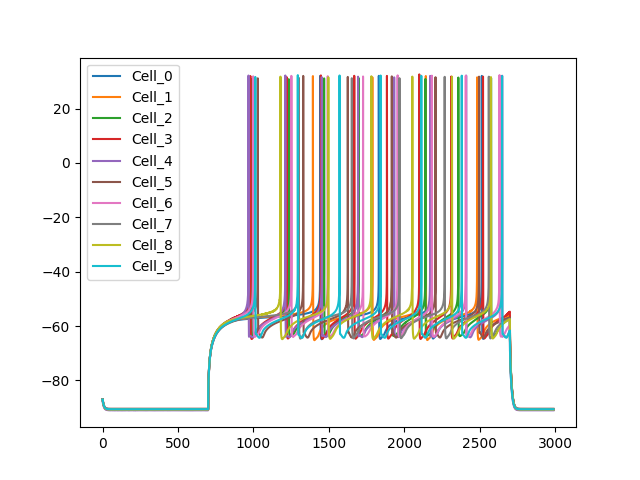

In [13]:
plt.figure()
for i, vm in enumerate(volt):
    plt.plot(time, vm, label='Cell_%d' % i)
plt.legend();

<IPython.core.display.Javascript object>


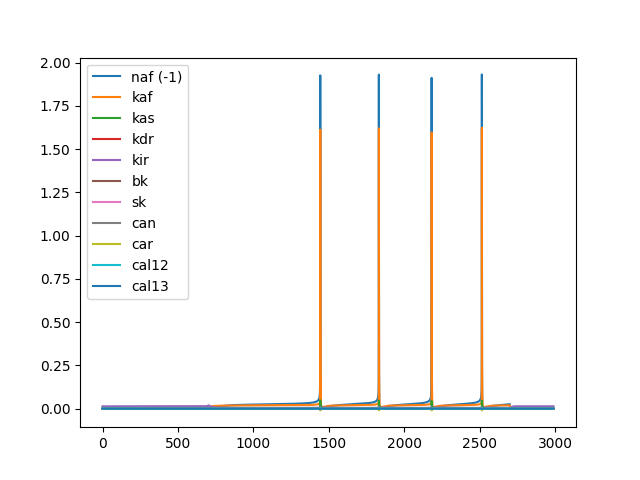

In [14]:
inaf_neg = np.array(inaf)*(-1.0)
plt.figure()
plt.plot(time, inaf_neg, label='naf (-1)')
plt.plot(time, ikaf, label='kaf')
plt.plot(time, ikas, label='kas')
plt.plot(time, ikdr, label='kdr')
plt.plot(time, ikir, label='kir')
plt.plot(time, ibk, label='bk')
plt.plot(time, ibk, label='sk')
plt.plot(time, ican, label='can')
plt.plot(time, icar, label='car')
plt.plot(time, ical12, label='cal12')
plt.plot(time, ical13, label='cal13')
plt.legend();

<IPython.core.display.Javascript object>


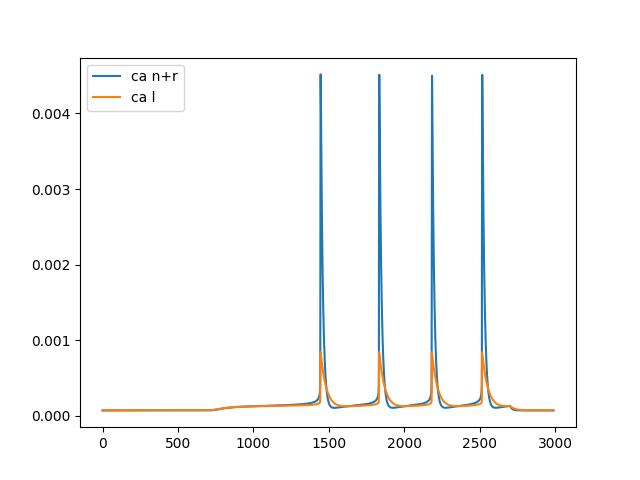

In [15]:
plt.figure()
plt.plot(time, ca, label='ca n+r')
plt.plot(time, cal, label='ca l')
plt.legend();